In [3]:
import os
import pathlib
import random

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

image_height = 1920
image_width = 1080

cwd = os.getcwd()
data_path = os.path.join(cwd, "images")
model_path = os.path.join(cwd, "models")

Found 10 files belonging to 2 classes.
Using 8 files for training.
Found 10 files belonging to 2 classes.
Using 1 files for validation.


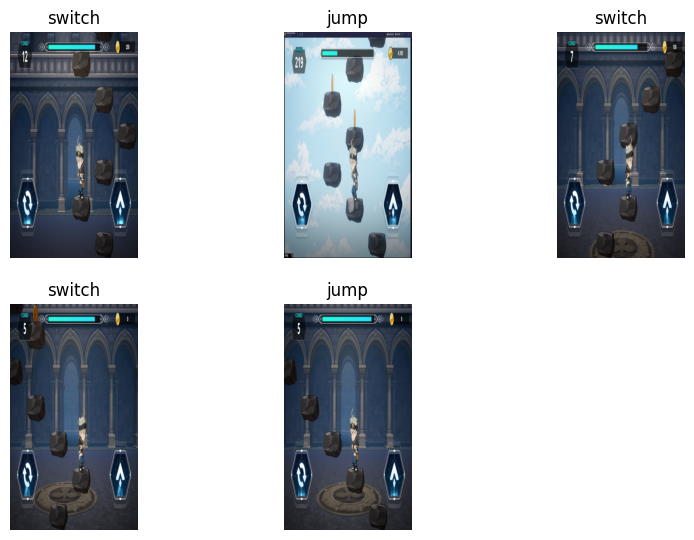

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset="training",
    validation_split=0.2,
    seed=123,
    image_size=(image_height, image_width),
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
)

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:

num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='Adam'
  , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  , metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 1920, 1080, 3)     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 1920, 1080, 16)    448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 960, 540, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 960, 540, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 480, 270, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 480, 270, 64)     

In [9]:
epochs=15
history=model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.6880 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 42.9286 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 13.3027 - accuracy: 0.7500 - val_loss: 7.7610 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 3s 3s/step - loss: 4.7055 - accuracy: 0.2500 - val_loss: 0.7209 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 3s 3s/step - loss: 0.1365 - accuracy: 1.0000 - val_loss: 1.5222e-04 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 3s 3s/step - loss: 1.0113 - accuracy: 0.8750 - val_loss: 6.5921e-05 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 3s 3s/step - loss: 0.9926 - accuracy: 0.8750 - val_loss: 3.0775e-04 - val_accuracy: 1.0000
Epoch 8/15


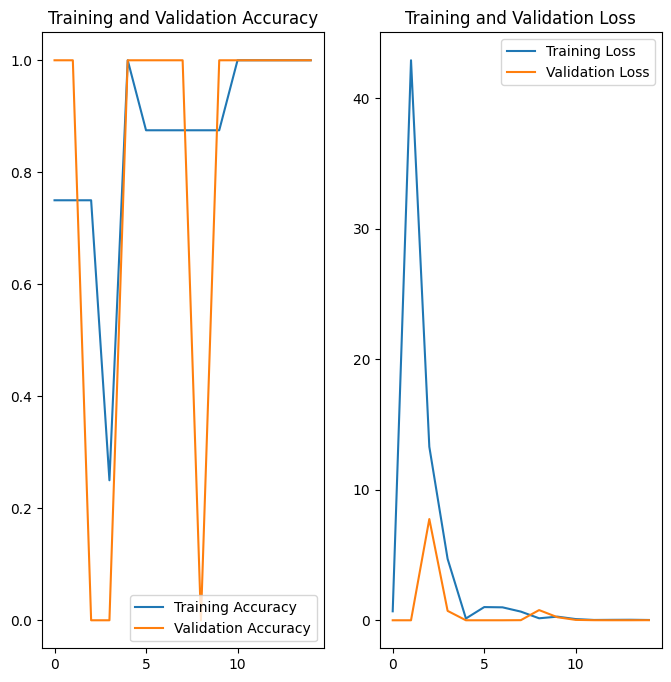

In [10]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 126ms/step


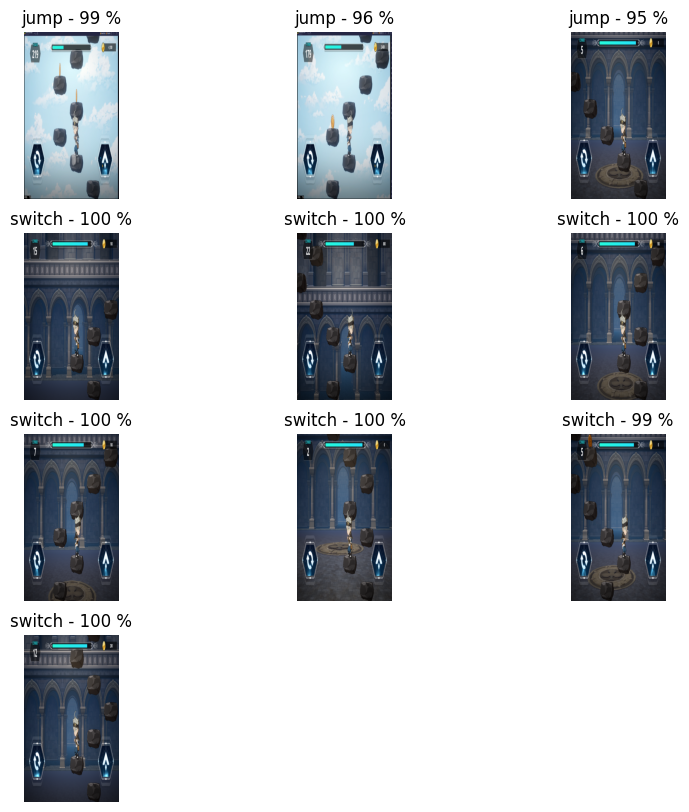

In [19]:
test_path = pathlib.Path('images/testing')
image_paths = list(test_path.glob('*.png'))
class_names = ['jump', 'switch']

plt.figure(figsize=(10, 10))

for i, path in enumerate(image_paths):
    img = keras.preprocessing.image.load_img(path, target_size=(image_height, image_width))
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    
    predictions = model.predict(img_arr)
    
    score = tf.nn.softmax(predictions[0])
    percent = int(round(100*np.max(score), 0))
    title = "{} - {} %".format(class_names[np.argmax(score)], percent)
    
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")